<a href="https://colab.research.google.com/github/Harshit0722/MediTalk/blob/main/Dataset_examination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pytorch

import re
import string
from tqdm import tqdm

import json
import os
import pyarrow.parquet as pq #To read parquet file

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: Could not build wheels for pytorch, which is required to install pyproject.toml-based projects


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Data Collection

In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/MED-qna/medmcqa-train.parquet')

In [ ]:
df.head()

,id,question,opa,opb,opc,opd,cop,choice_type,exp,subject_name,topic_name
0,e9ad821a-c438-4965-9f77-760819dfa155,Chronic urethral obstruction due to benign pri...,Hyperplasia,Hyperophy,Atrophy,Dyplasia,2,single,Chronic urethral obstruction because of urinar...,Anatomy,Urinary tract
1,e3d3c4e1-4fb2-45e7-9f88-247cc8f373b3,Which vitamin is supplied from only animal sou...,Vitamin C,Vitamin B7,Vitamin B12,Vitamin D,2,single,Ans. (c) Vitamin B12 Ref: Harrison's 19th ed. ...,Biochemistry,Vitamins and Minerals
2,5c38bea6-787a-44a9-b2df-88f4218ab914,All of the following are surgical options for ...,Adjustable gastric banding,Biliopancreatic diversion,Duodenal Switch,Roux en Y Duodenal By pass,3,multi,"Ans. is 'd' i.e., Roux en Y Duodenal Bypass Ba...",Surgery,Surgical Treatment Obesity
3,cdeedb04-fbe9-432c-937c-d53ac24475de,Following endaerectomy on the right common car...,Central aery of the retina,Infraorbital aery,Lacrimal aery,Nasociliary aretry,0,multi,The central aery of the retina is a branch of ...,Ophthalmology,None
4,dc6794a3-b108-47c5-8b1b-3b4931577249,Growth hormone has its effect on growth through?,Directly,IG1-1,Thyroxine,Intranuclear receptors,1,single,"Ans. is 'b' i.e., IGI-1GH has two major functi...",Physiology,None


In [6]:
df.exp.value_counts()

.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

# Data Preprocessing to check the relevance for our application

In [7]:
#Conversion to lower string:-
df['exp'] = df['exp'].str.lower()
df['question'] = df['question'].str.lower()
df['subject_name'] = df['subject_name'].str.lower()
df['topic_name'] = df['topic_name'].str.lower()
df['opa'] = df['opa'].str.lower()
df['opb'] = df['opb'].str.lower()
df['opc'] = df['opc'].str.lower()
df['opd'] = df['opd'].str.lower()

In [8]:
df.head()

,id,question,opa,opb,opc,opd,cop,choice_type,exp,subject_name,topic_name
0,e9ad821a-c438-4965-9f77-760819dfa155,chronic urethral obstruction due to benign pri...,hyperplasia,hyperophy,atrophy,dyplasia,2,single,chronic urethral obstruction because of urinar...,anatomy,urinary tract
1,e3d3c4e1-4fb2-45e7-9f88-247cc8f373b3,which vitamin is supplied from only animal sou...,vitamin c,vitamin b7,vitamin b12,vitamin d,2,single,ans. (c) vitamin b12 ref: harrison's 19th ed. ...,biochemistry,vitamins and minerals
2,5c38bea6-787a-44a9-b2df-88f4218ab914,all of the following are surgical options for ...,adjustable gastric banding,biliopancreatic diversion,duodenal switch,roux en y duodenal by pass,3,multi,"ans. is 'd' i.e., roux en y duodenal bypass ba...",surgery,surgical treatment obesity
3,cdeedb04-fbe9-432c-937c-d53ac24475de,following endaerectomy on the right common car...,central aery of the retina,infraorbital aery,lacrimal aery,nasociliary aretry,0,multi,the central aery of the retina is a branch of ...,ophthalmology,None
4,dc6794a3-b108-47c5-8b1b-3b4931577249,growth hormone has its effect on growth through?,directly,ig1-1,thyroxine,intranuclear receptors,1,single,"ans. is 'b' i.e., igi-1gh has two major functi...",physiology,None


In [9]:
#Checking for NaN values:-
df.isna().sum()

id                  0
question            0
opa                 0
opb                 0
opc                 0
opd                 0
cop                 0
choice_type         0
exp             21953
subject_name        0
topic_name      95613
dtype: int64

In [24]:
#Dropping NaN values to analyze dataset:-
df1 = df.dropna(subset = ['exp'])
df2 = df1.dropna(subset = ['topic_name'])

In [25]:
df2.isna().sum()

id              0
question        0
opa             0
opb             0
opc             0
opd             0
cop             0
choice_type     0
exp             0
subject_name    0
topic_name      0
dtype: int64

<Axes: xlabel='topic_name', ylabel='count'>

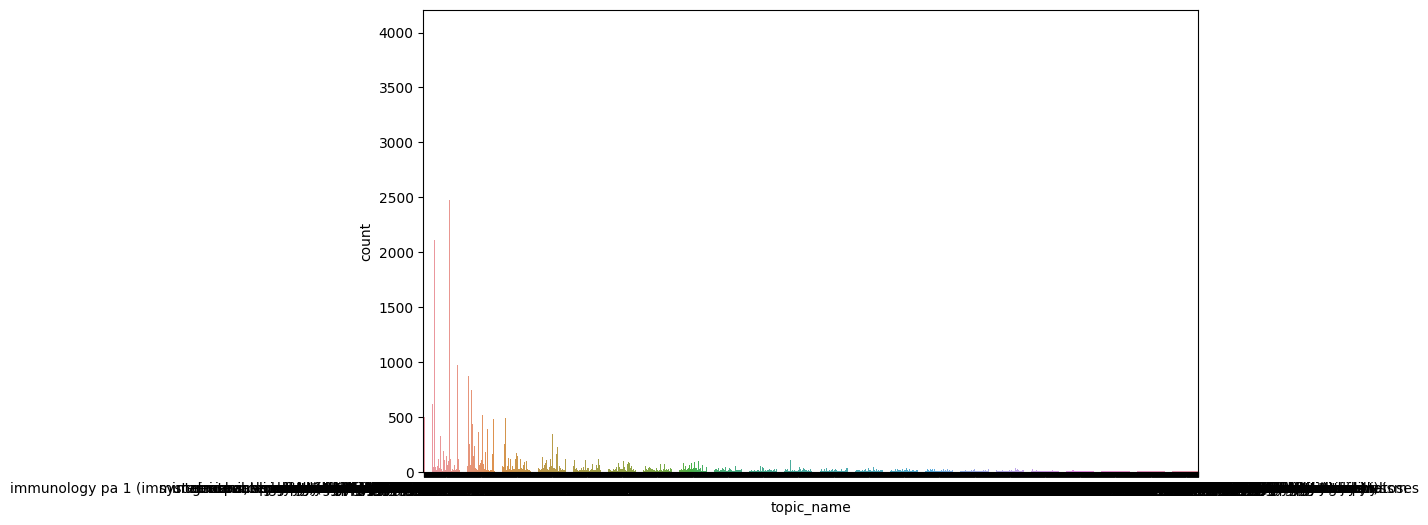

In [27]:
#Checking the variance of topics (should be sufficiently large):-
plt.figure(figsize=(10,6))
sns.countplot(x = 'topic_name',data=df2)

In [29]:
text = ' '.join(df2['subject_name'].tolist())

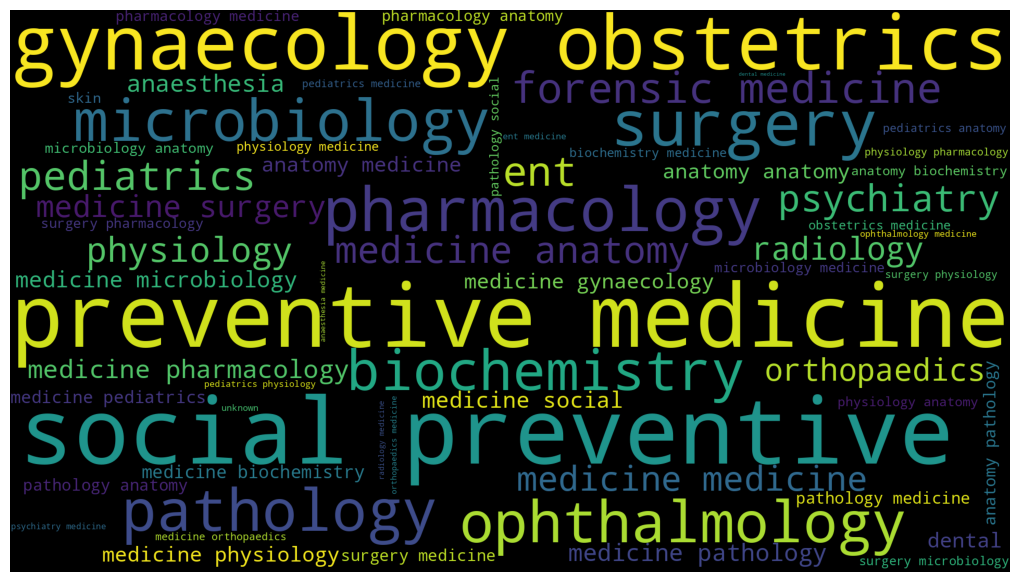

In [31]:
#Checking the most frequent domain of questions to better predict our potential model's performance in several domains:-
from wordcloud import WordCloud
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()